PCA and LDA are for linear supervised and unsupervised models.

For Non linear problems we use Kernal PCA

In [15]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
#Importing the dataset


dataset = pd.read_csv('Social_Network_Ads.csv')       #dataset is of type DataFrame

X = dataset.iloc[:,[2,3]].values           #using .values generates array
y = dataset.iloc[:,-1].values             #x & y is of type np.ndarray


In [17]:
#Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 , random_state = 0)
print(X_train.shape)

(300, 2)


In [18]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [21]:
#Applying Kernel PCA 
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2  , kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.57095752 0.42904248]


In [22]:
#Fitting Logistic Regression to the dataset

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#Prediicting the Test Set results

y_pred = classifier.predict(X_test)

In [24]:
#Making ConfusionMatrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[64  4]
 [ 6 26]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


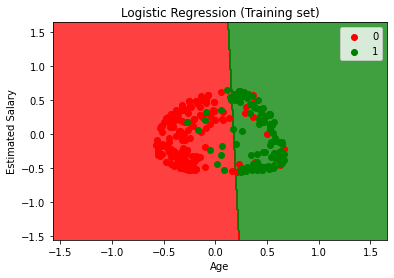

In [25]:
#Visualizing teh training set results 
from matplotlib.colors import ListedColormap
X_set ,y_set = X_train ,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                                                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1],
              c = ListedColormap(("red" , "green"))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


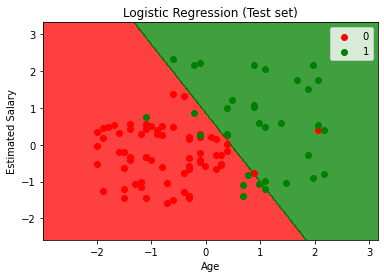

In [ ]:
#Visualizing teh test set results 
from matplotlib.colors import ListedColormap
X_set ,y_set = X_test ,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                                                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1],
              c = ListedColormap(("red" , "green"))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
